<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

# Grouping with Pandas (Lab)

***

Week 2 | Lab 6.1

## Group Exercize (~80mins-ish)

We are going to investigate the nuances of UFO sightings around the US.  By now you should be able to perform groupby operations in multiple dimensions and investigate the relationships between subsets of datasets with basic aggregation.

_Protip, to turn off slide type headers from every dataframe, go to "View" and select "None" from "Cell Toolbar"_

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# Load the UFO dataset!
# Did you know you can load csv over HTTP?  It's not ideal, but it can be done!

ufo = pd.read_csv('https://raw.githubusercontent.com/sinanuozdemir/SF_DAT_17/master/data/ufo.csv')

### 1. How many non-null values exist per each variable?

The first thing that is important to know is how complete our dataset is and how uniform are the values.

In [6]:
# Solution here
ufo.info() # keeps track of missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
City               80496 non-null object
Colors Reported    17034 non-null object
Shape Reported     72141 non-null object
State              80543 non-null object
Time               80543 non-null object
dtypes: object(5)
memory usage: 3.1+ MB


### 2. What is the breakdown of dtypes in our dataframe?

In [7]:
# Solution here
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

### 3. Provide a "Data Dictionary" that describes these features:

 - Variable / feature name
 - Brief description of what variable appears to represent
 - Expected dtype(s)
 - Number of unique values observed if categorical and < 20 unqiue 


In [8]:
## Change this cell to a "markdown" type cell
ufo_dict = {column: (ufo[column].unique().shape[0], ufo[column].dtype) for column in ufo.columns}

In [9]:
ufo_dict

{'City': (13505, dtype('O')),
 'Colors Reported': (32, dtype('O')),
 'Shape Reported': (28, dtype('O')),
 'State': (52, dtype('O')),
 'Time': (68901, dtype('O'))}

### 3. Which colors are most commonly reported?
Provide a breakdown of colors by count.

In [6]:
ufo['Colors Reported'].value_counts()

ORANGE                          5216
RED                             4809
GREEN                           1897
BLUE                            1855
YELLOW                           842
RED ORANGE                       486
RED GREEN                        469
RED BLUE                         445
RED GREEN BLUE                   166
GREEN BLUE                       147
RED YELLOW                       146
ORANGE YELLOW                    137
ORANGE GREEN                      66
ORANGE BLUE                       58
YELLOW GREEN                      53
RED YELLOW BLUE                   36
RED YELLOW GREEN                  35
RED ORANGE YELLOW                 32
YELLOW BLUE                       27
RED YELLOW GREEN BLUE             26
RED ORANGE BLUE                   21
YELLOW GREEN BLUE                 13
ORANGE GREEN BLUE                 13
RED ORANGE GREEN                  12
RED ORANGE GREEN BLUE              8
ORANGE YELLOW GREEN                5
RED ORANGE YELLOW GREEN            4
O

### 4. Which shapes are most commonly reported?

In [7]:
ufo['Shape Reported'].value_counts()

LIGHT        16332
TRIANGLE      7816
CIRCLE        7725
FIREBALL      6249
OTHER         5506
SPHERE        5231
DISK          5226
OVAL          3721
FORMATION     2405
CIGAR         1983
VARIOUS       1957
FLASH         1329
RECTANGLE     1295
CYLINDER      1252
DIAMOND       1152
CHEVRON        940
EGG            733
TEARDROP       723
CONE           310
CROSS          241
DELTA            7
CRESCENT         2
ROUND            2
HEXAGON          1
FLARE            1
PYRAMID          1
DOME             1
Name: Shape Reported, dtype: int64

### 5. Are there any shapes that take on some colors more than others?
_* Warning: Use of broad langauge._

In [8]:
ufo.groupby(["Shape Reported", "Colors Reported"]).size().sort_values(ascending=False)

Shape Reported  Colors Reported         
LIGHT           RED                         1188
                ORANGE                      1122
FIREBALL        ORANGE                       884
CIRCLE          ORANGE                       796
SPHERE          ORANGE                       569
TRIANGLE        RED                          561
CIRCLE          RED                          548
LIGHT           BLUE                         403
                GREEN                        378
FIREBALL        RED                          377
                GREEN                        353
SPHERE          RED                          335
TRIANGLE        ORANGE                       299
OVAL            ORANGE                       236
OTHER           RED                          233
LIGHT           YELLOW                       208
FORMATION       RED                          207
                ORANGE                       206
OTHER           ORANGE                       199
CIRCLE          BLUE        

### 6. Display only the group for "CIGAR" using a mask.. 
Go ahead try it out.

In [9]:
ufo[ufo['Shape Reported'] == 'CIGAR']

,City,Colors Reported,Shape Reported,State,Time
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
25,San Diego,NaN,CIGAR,CA,1/1/1944 12:00
32,Ft. Lee,NaN,CIGAR,VA,1/1/1945 12:00
74,Syracuse,NaN,CIGAR,NY,7/14/1947 10:30
88,Proctor,NaN,CIGAR,OK,8/15/1947 20:15
89,Whitmore Lake,NaN,CIGAR,MI,12/24/1947 21:00
105,Salem,NaN,CIGAR,OR,6/30/1949 21:00
117,Baltimore,NaN,CIGAR,MD,10/15/1949 20:00
138,Coeur d'Alene,ORANGE,CIGAR,ID,7/2/1950 13:00
149,Palm Springs,NaN,CIGAR,CA,1/20/1951 4:30


### 7. Return only the group for "VARIOUS" without using a mask..
It can be done and we're not just making this up!

In [10]:
ufo.groupby("Shape Reported").get_group("VARIOUS")

,City,Colors Reported,Shape Reported,State,Time
292,Morroco,NaN,VARIOUS,IN,7/12/1954 17:30
599,Silverfdale,NaN,VARIOUS,WA,6/1/1960 22:00
656,Parris Island,NaN,VARIOUS,SC,5/15/1961 4:00
707,Pittsburg,RED,VARIOUS,OK,5/15/1962 21:30
736,Avon-by-the-Sea,ORANGE,VARIOUS,NJ,7/15/1962 2:00
784,Tishimingo,NaN,VARIOUS,OK,5/15/1963 22:00
895,Atlanta,NaN,VARIOUS,GA,6/29/1964 21:50
1040,Waterford,NaN,VARIOUS,MI,7/6/1965 23:00
1077,Minneapolis,NaN,VARIOUS,MN,8/8/1965 23:10
1103,Great Bend,NaN,VARIOUS,KS,9/15/1965 22:00


In [11]:
for group, group_df in ufo.groupby("Shape Reported"):
    if group == "VARIOUS":
        print group_df

                             City Colors Reported Shape Reported State  \
292                       Morroco             NaN        VARIOUS    IN   
599                   Silverfdale             NaN        VARIOUS    WA   
656                 Parris Island             NaN        VARIOUS    SC   
707                     Pittsburg             RED        VARIOUS    OK   
736               Avon-by-the-Sea          ORANGE        VARIOUS    NJ   
784                    Tishimingo             NaN        VARIOUS    OK   
895                       Atlanta             NaN        VARIOUS    GA   
1040                    Waterford             NaN        VARIOUS    MI   
1077                  Minneapolis             NaN        VARIOUS    MN   
1103                   Great Bend             NaN        VARIOUS    KS   
1399   Shofield Barracks-Civilian             NaN        VARIOUS    HI   
1495                       Camden             NaN        VARIOUS    NJ   
1606                       Renton     

### 8. Plot the counts of shapes, states, colors
Double check our notebook and feel free to use Google for help.

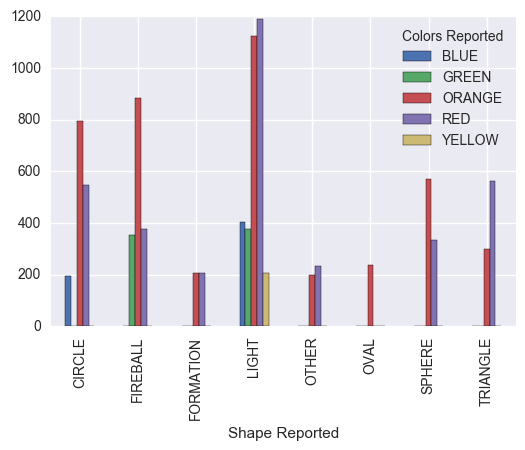

In [12]:
ufo.groupby(by=["Shape Reported", "Colors Reported"]).size().sort_values(ascending=False)[:20].unstack().plot(kind='bar')

### 9. Plot counts of sightings per City

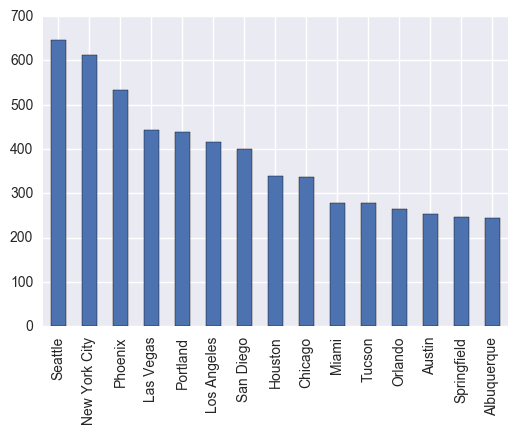

In [13]:
ufo['City'].value_counts()[:15].plot(kind='bar')

### 10.  Your co-worker in your data science team has approached you with some concerns..

<center>![a real data scientist](http://nerdist.com/wp-content/uploads/2016/02/20160225_becausescience_pokemon_1x1.jpg)
_* Actual data scientists may vary in appearance_
</center>


They tell you that group counting your sightings by city might be inaccurate.  How can you reassure them that your logic is sound and you are certianly correct?  Demonstrate to them, in any other way possible (with code) that you think counting groups by city is a good idea (right?).  Show them by using another method, or grouping in conjunction with other variables validates your assumptions.

### 11.  Which cities have the most "CIGAR" sightings?

In [14]:
ufo[ufo['Shape Reported'] == 'CIGAR']['City'].value_counts().nlargest(20)

New York City    19
Los Angeles      18
Phoenix          16
Seattle          14
Sacramento       13
Springfield      13
Chicago          10
San Diego        10
Las Vegas         9
Charlotte         9
Albany            8
El Paso           7
St. Louis         7
Boston            7
Dallas            7
Cleveland         7
Portland          7
Miami             7
Albuquerque       7
Kansas City       7
Name: City, dtype: int64

---

Ask instructors for help on everything previous to this point, but we have designed the bonus material around collaboration in mind.  The next few problems are to be completed without instructor help.

```
if lab_question > 11:
    no_instructors_allowed()
```

### 12.  Bonus:  Display only top 20 shape counts reported by state!

This is a weird problem yes?  You're going to have weird questions and google is your friend!  So for this problem, we have found the answer with the search term "pandas top 10 by group" is a semi-obvious place where you will find many of these types of answers.

You will easily find the answer but you will need to think about how to implement the solution as the ones you find won't be copy and paste but should demonstrate the intuition for doing so using a grouby object.

This is the expected output, _using a groupby() and [some method(s)] to display "State" and "Shape" as your group indexes with a count!_:

```
State  Shape Reported
CA     LIGHT             2171
       CIRCLE            1023
WA     LIGHT             1016
CA     TRIANGLE           955
FL     LIGHT              916
TX     LIGHT              847
CA     FIREBALL           808
       DISK               775
       OTHER              749
       SPHERE             726
NY     LIGHT              691
AZ     LIGHT              677
IL     LIGHT              600
PA     LIGHT              581
OH     LIGHT              525
FL     FIREBALL           524
MI     LIGHT              468
FL     CIRCLE             467
OR     LIGHT              466
CA     OVAL               465
dtype: int64
```

In [15]:
ufo.groupby(["State", "Shape Reported"]).size().sort_values(ascending=False)[:20]

ufo.groupby(["State", "Shape Reported"]).size().nlargest(20)

State  Shape Reported
CA     LIGHT             2171
       CIRCLE            1023
WA     LIGHT             1016
CA     TRIANGLE           955
FL     LIGHT              916
TX     LIGHT              847
CA     FIREBALL           808
       DISK               775
       OTHER              749
       SPHERE             726
NY     LIGHT              691
AZ     LIGHT              677
IL     LIGHT              600
PA     LIGHT              581
OH     LIGHT              525
FL     FIREBALL           524
MI     LIGHT              468
FL     CIRCLE             467
OR     LIGHT              466
CA     OVAL               465
dtype: int64

### 13.  Bonus:  What are the top 20 shapes by City + State?


In [16]:
ufo.groupby(["State", "City", "Shape Reported"]).size().sort_values(ascending=False)

State  City                    Shape Reported
WA     Seattle                 LIGHT             129
NY     New York City           LIGHT             105
AZ     Phoenix                 LIGHT             105
CA     San Diego               LIGHT              94
OR     Portland                LIGHT              88
NV     Las Vegas               LIGHT              84
CA     Los Angeles             LIGHT              72
SC     Myrtle Beach            LIGHT              64
TX     Houston                 LIGHT              63
NY     New York City           DISK               63
IL     Tinley Park             LIGHT              60
AZ     Tucson                  LIGHT              58
NY     New York City           CIRCLE             56
WA     Seattle                 FIREBALL           55
FL     Orlando                 LIGHT              55
       Miami                   LIGHT              53
NY     New York City           SPHERE             51
WA     Seattle                 OTHER              51


### 14. Bonus: What hours of the day are sightings most commonly reported?

To solve this problem, you will need to follow these steps:
    - Convert time feature to datetime type
    - Create a new feature based on a characteristic of the first step
    

In [17]:
ufo['Time Year'] = pd.to_datetime(ufo.Time)
ufo['Time Hour'] = ufo['Time Year'].dt.hour

In [18]:
ufo['Time Hour'].value_counts()

21    11837
22    10993
20     8636
23     7821
19     5976
0      4930
18     3913
1      3146
17     2512
2      2281
3      1981
5      1657
16     1592
4      1534
12     1403
15     1397
13     1311
14     1289
10     1229
6      1190
11     1146
9      1031
7       913
8       825
Name: Time Hour, dtype: int64

### 15. BONUS BONUS:  Generally, what interesting insights can you share about our UFO dataset?
    
Be as detailed as possible and tell us a nice story (long or short), about your observations.  Great ideas are:
 - Summary statistics
 - Outliers
 - Patterns
 - Latent characteristics
 - Graphs / plots / ascii art

In [ ]:
ufo.groupby('State').size().sort_values(ascending=False).plot(figsize=(12,4), kind='bar');